<a href="https://colab.research.google.com/github/micahvarkyez/micahvarkyez/blob/main/Micah's_project_on_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Load the Titanic dataset
titanic = pd.read_csv('/content/train.csv')

In [90]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
# No of missing values by each columns/variable
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Conclusion about missing values**
 - Age has got 177 missing values
 - Embarked has got 2 missing values
 - cabin has lot of missing values so its bettet to drop that variable

**Numerical Columns**

**1. Age Variable**

**Conclusion**
- Age is normally(almost) distributed
- 20% of the values are missing
- there are some outiliers

In [94]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [95]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: title={'center': 'Age Histogram'}, ylabel='Frequency'>

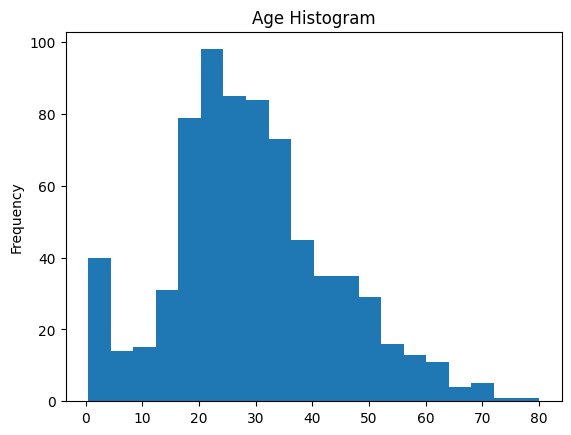

In [96]:
#Histogram - to know the distribution
titanic.Age.plot(kind='hist',bins=20, title="Age Histogram")

<Axes: title={'center': 'Age kde plot'}, ylabel='Density'>

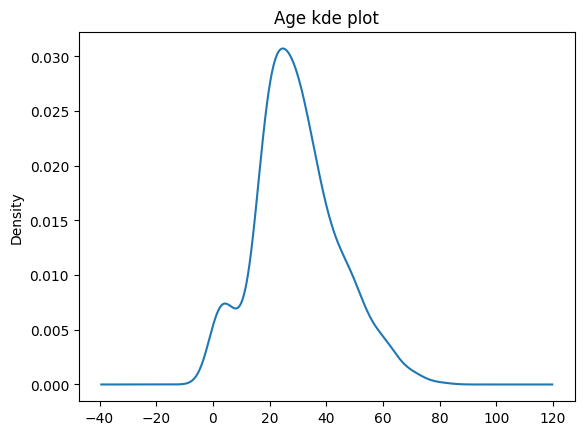

In [97]:
#kde plot to know the distribution
titanic.Age.plot(kind='kde', title="Age kde plot")

In [98]:
titanic.Age.skew()

0.38910778230082704

In [99]:
titanic.Age.isnull().sum()

177

In [100]:
len(titanic.Age)

891

In [101]:
177/891

0.19865319865319866

In [102]:
#checking percent missing values
titanic.Age.isnull().sum()/len(titanic.Age)

0.19865319865319866

<Axes: title={'center': 'Age Box Plot'}>

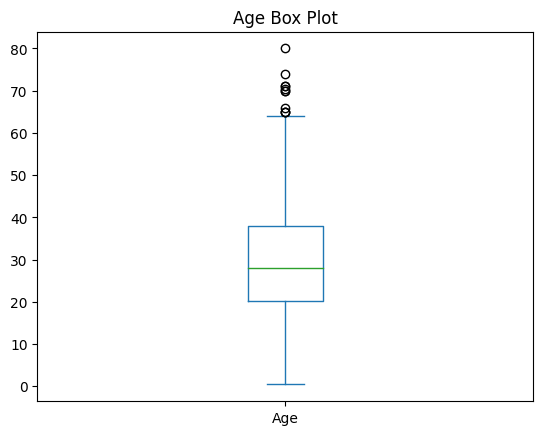

In [103]:
#outlier detection
titanic.Age.plot(kind='box', title= 'Age Box Plot')

In [104]:
titanic[titanic['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


**2. Fare Variable**

**Survived**

**Conclusion**
- 61.62 per cent of people dead in the titanic disaster
- 38.38 per cent of people survived

In [105]:
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [106]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: title={'center': 'Bar plot of Survived Variable'}>

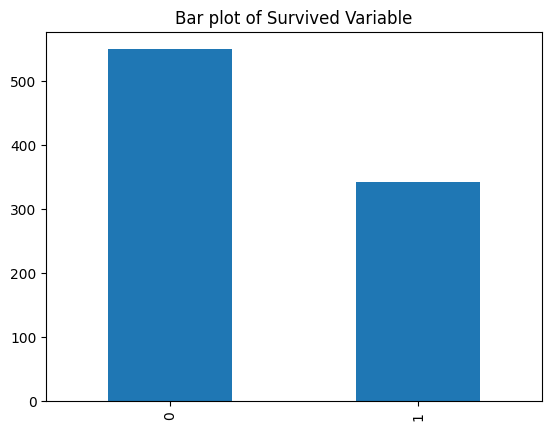

In [107]:
titanic['Survived'].value_counts().plot(kind='bar', title='Bar plot of Survived Variable')

<Axes: ylabel='Survived'>

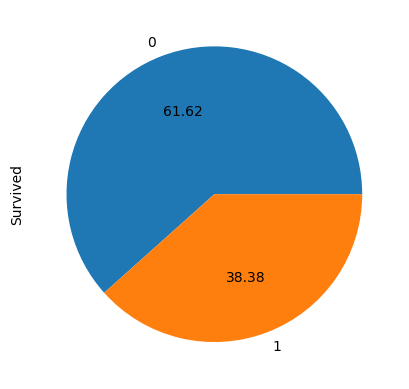

In [108]:
titanic['Survived'].value_counts().plot(kind='pie', autopct= '%.2f')

**Pclass variable**

**Conclusion**
- the people travelled in 1st class were more than people travelled in 2nd Class

In [109]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

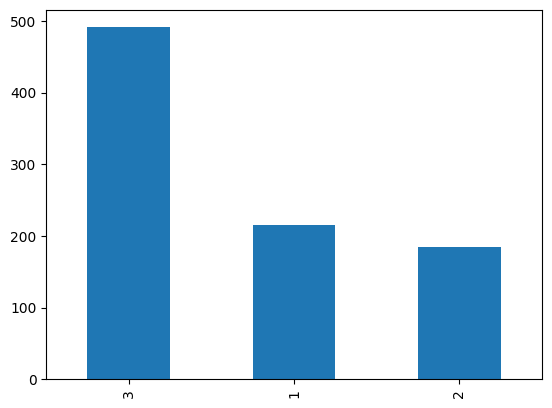

In [110]:
titanic['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='Pclass'>

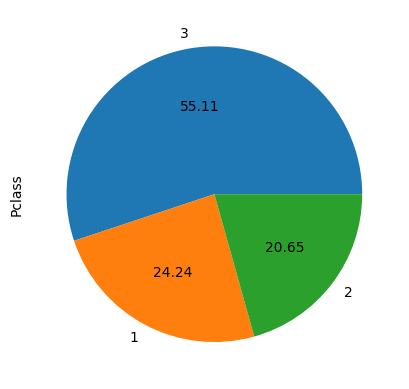

In [111]:
titanic['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

In [112]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: >

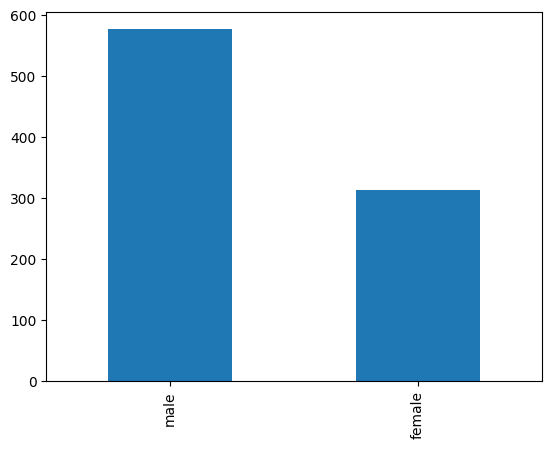

In [113]:
titanic['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Sex'>

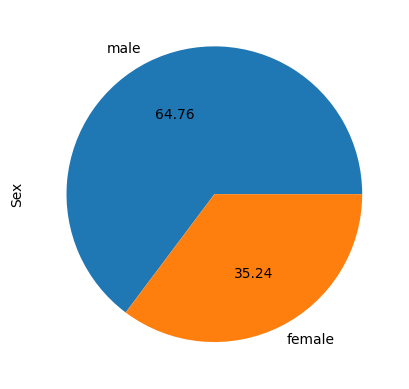

In [114]:
titanic['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

In [115]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: ylabel='SibSp'>

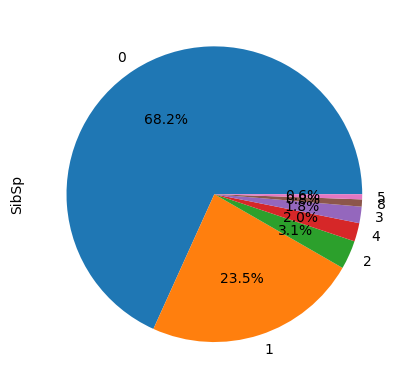

In [116]:
titanic['SibSp'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [117]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [118]:
titanic[titanic['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [119]:
titanic[titanic['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [120]:
69.55/11

6.322727272727272

In [121]:
# pd.crosstab(df['col1'], df['col2'])
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


**Conclusion**
- People travelling in Pclass 1 are more likely to survive

<Axes: xlabel='Pclass', ylabel='Survived'>

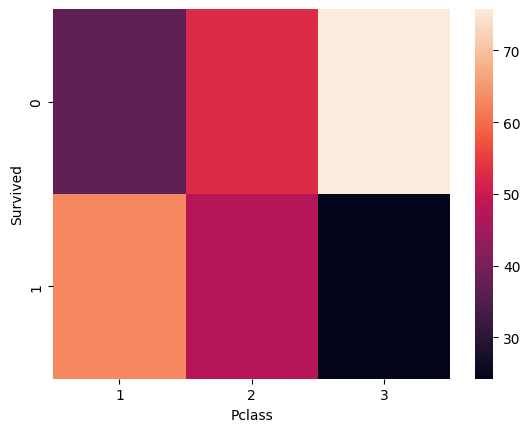

In [122]:
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Pclass'], normalize='columns')*100)

In [123]:
#cross across multiple categorical variables
pd.crosstab(index=[titanic['Survived'], titanic['Sex']], columns=titanic['Pclass'], normalize='columns')*100

Pclass                   1          2          3
Survived Sex                                    
0        female   1.388889   3.260870  14.663951
         male    35.648148  49.456522  61.099796
1        female  42.129630  38.043478  14.663951
         male    20.833333   9.239130   9.572301

<Axes: xlabel='Pclass', ylabel='Survived-Sex'>

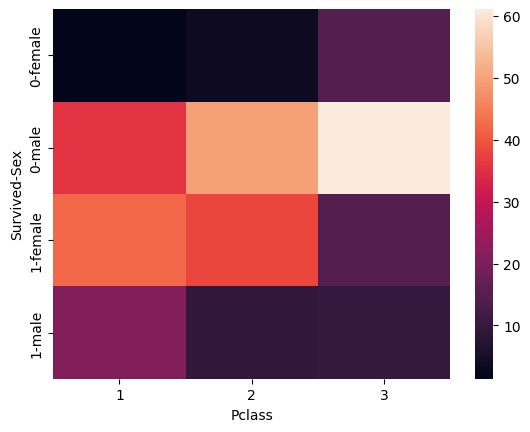

In [124]:
# heat map for more than two variables
sns.heatmap(pd.crosstab(index=[titanic['Survived'], titanic['Sex']], columns=titanic['Pclass'], normalize='columns')*100)

In [125]:
# pd.crosstab(df['col1'], df['col2'])
pd.crosstab(index= titanic['Survived'], columns=[titanic['Sex'],titanic['Pclass']])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

**Conclusion**
- Females (74.20 %) are more likely to survive than male(18.89%)

<Axes: xlabel='Sex', ylabel='Survived'>

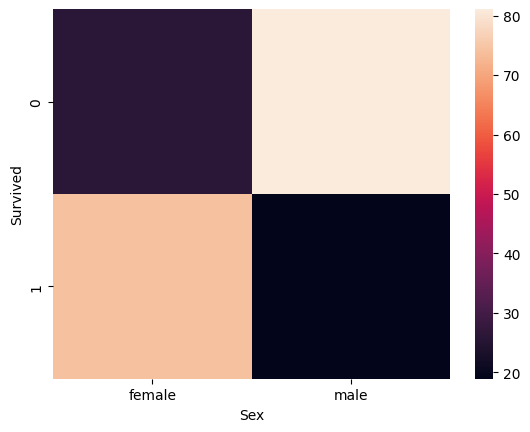

In [126]:
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Sex'], normalize='columns')*100)

In [127]:
pd.crosstab(titanic['Survived'],titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [128]:
pd.crosstab(titanic['Survived'],titanic['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

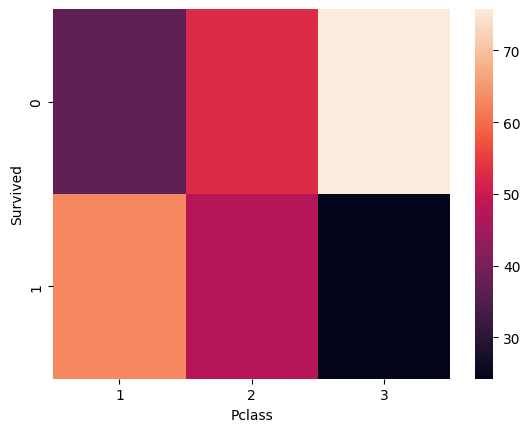

In [129]:
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Pclass'], normalize='columns')*100)

**Age vs Survived**

<Axes: ylabel='Density'>

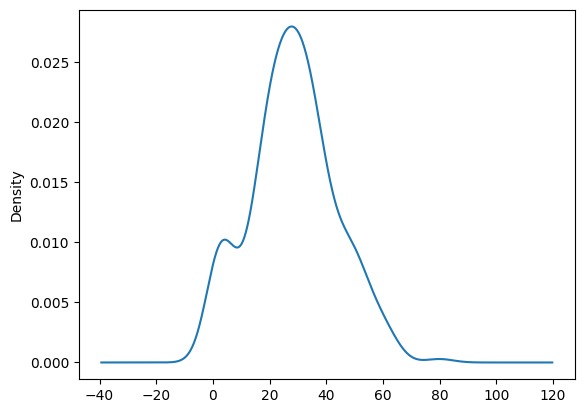

In [130]:
titanic[titanic['Survived'] == 1]['Age'].plot(kind='kde', label='Dist of Age of people Survived')

<Axes: ylabel='Density'>

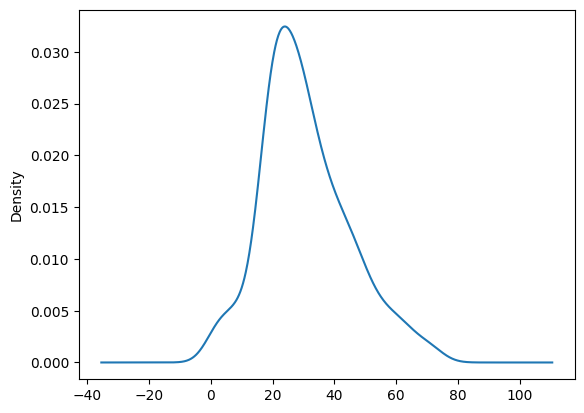

In [131]:
titanic[titanic['Survived'] == 0]['Age'].plot(kind='kde', label='Dist of Age of people Survived')

<Axes: ylabel='Density'>

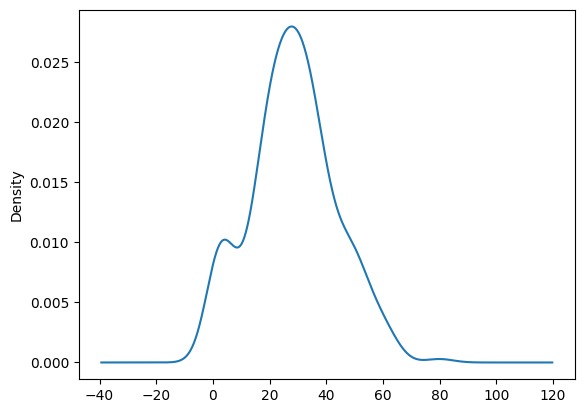

In [132]:
titanic[titanic['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')

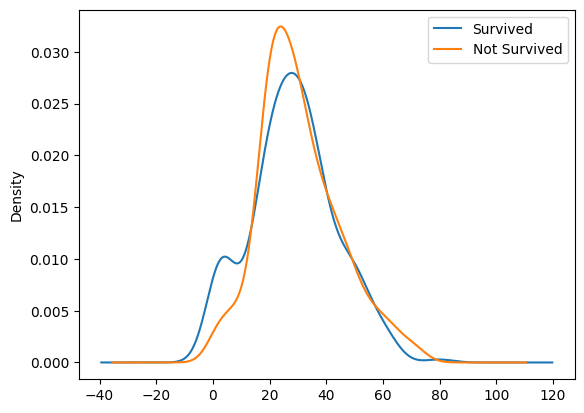

In [133]:
titanic[titanic['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')

titanic[titanic['Survived'] == 0]['Age'].plot(kind='kde', label='Not Survived')

plt.legend()
plt.show()

In [134]:
titanic[titanic['Pclass']==1]['Age'].mean()

38.233440860215055

**Feature engineering on fare col**

In [135]:
titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [136]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [137]:
#new feature called family_size
titanic['family_size']=titanic['SibSp']+titanic['Parch']+1

individual fare = fare/family_size

In [138]:
#indiviual fare columns
titanic['ind_fare'] = titanic['Fare']/titanic['family_size']

In [139]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [140]:
titanic[titanic['Ticket'] == 'CA. 2343' ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,ind_fare
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727


**family type , if family size = 1 then alone, if family size =>2 less than 5 then small family, if family size is >5 then large family**

In [141]:
def function_name(a,b,c):
    return a+b+c

In [142]:
function_name(1,2,3)

6

In [143]:
# custom or user defined function
def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num >1 and num <5:
        return 'small family'
    else:
        return 'large family'

In [144]:
titanic['family_type']= titanic['family_size'].apply(transform_family_size)

In [145]:
titanic['family_type']

0      small family
1      small family
2             alone
3      small family
4             alone
           ...     
886           alone
887           alone
888    small family
889           alone
890           alone
Name: family_type, Length: 891, dtype: object

In [146]:
titanic[titanic['family_size']==4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,ind_fare,family_type
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,4,10.394800,small family
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,4,6.937500,small family
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S,4,3.962500,small family
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.00,1,2,C.A. 2315,20.5750,NaN,S,4,5.143750,small family
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,4,9.750000,small family
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,4,37.887500,small family
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,4,37.887500,small family
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S,4,30.000000,small family
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S,4,30.000000,small family
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C,4,4.814575,small family


In [147]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,ind_fare,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,small family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,small family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,small family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,13.00000,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,30.00000,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,5.86250,small family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,30.00000,alone


In [148]:
pd.crosstab(titanic['Survived'],titanic['family_type'],normalize='columns')*100

family_type,alone,large family,small family
Survived,,,
0,69.646182,83.870968,42.123288
1,30.353818,16.129032,57.876712


In [149]:
pd.crosstab(titanic['Survived'],titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [150]:
# one reason higher class-correct
# people boarded from c port are females (most of them) - wrong

In [151]:
pd.crosstab(titanic['Sex'],titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [152]:
pd.crosstab(titanic['Pclass'],titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


In [153]:
# one reason higher class-correct
# people boarded from c port are females (most of them) - wrong

In [154]:
# custom or user defined function
def age_trans(num):
    if  0< num <=15:
        return 'kid'
    elif num <=60:
        return 'adults'
    else:
        return 'seniors'

In [155]:
titanic['Age_group'] = titanic['Age'].apply(age_trans)

In [156]:
titanic[titanic['Age'] == 16]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,ind_fare,family_type,Age_group
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,8,5.862500,large family,adults
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S,5,6.875000,large family,adults
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,1,9.216700,alone,adults
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q,1,7.733300,alone,adults
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,1,7.750000,alone,adults
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,1,8.050000,alone,adults
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,6,6.614583,large family,adults
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,1,9.500000,alone,adults
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,2,28.989600,small family,adults
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S,3,6.000000,small family,adults


In [157]:
pd.crosstab(titanic['Survived'],titanic['Age_group'],normalize='columns')*100

Age_group,adults,kid,seniors
Survived,,,
0,61.247947,40.963855,71.356784
1,38.752053,59.036145,28.643216


In [158]:
titanic['family_type'].unique()

array(['small family', 'alone', 'large family'], dtype=object)

In [159]:
titanic['Survived'].unique()

array([0, 1])